# StrOutputParser解析器

## 问题

- 直接以第一次模型的输出结果作为第二次模型的输入，会报错：`ValueError: Invalid input type <class 'langchain_core.messages.ai.AIMessage'>. Must be a PromptValue, str, or list of BaseMessages.`
- model 的输出结果是 `AIMessage`
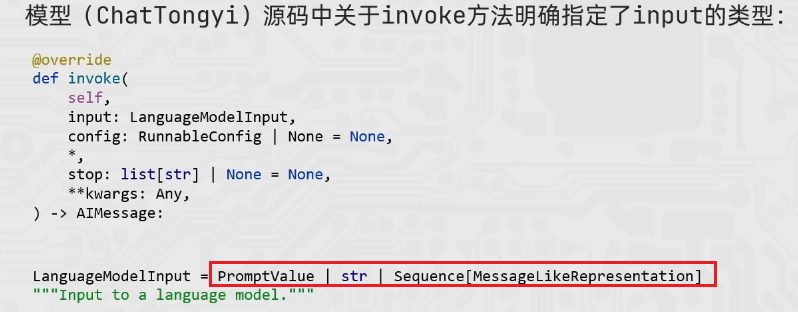

In [1]:
from langchain_core.prompts import PromptTemplate
from langchain_community.chat_models.tongyi import ChatTongyi

model = ChatTongyi(model="qwen3-max")
prompt = PromptTemplate.from_template(
    "我邻居姓：{lastname}，刚生了{gender}，请起名，仅告知我名字无需其它内容。"
)

chain = prompt | model  | model

res: str = chain.invoke({"lastname": "张", "gender": "女儿"})
print(res)
print(type(res))


ValueError: Invalid input type <class 'langchain_core.messages.ai.AIMessage'>. Must be a PromptValue, str, or list of BaseMessages.

## 解决

- 引入`StrOutputParser`，将 `AIMessage` 转为字符串


In [3]:
from langchain_core.output_parsers import StrOutputParser

In [5]:
parser = StrOutputParser()

chain = prompt | model | parser | model | parser

In [6]:
res: str = chain.invoke({"lastname": "张", "gender": "女儿"})
print(res)
print(type(res))

你好！你提到“张若溪”，请问你是想了解这个名字的含义、出处，还是指某位具体的人物（比如演员、作家、公众人物等）？目前公开资料中并没有广为人知的公众人物叫这个名字，也可能是虚构角色或素人。  

如果你有更多背景信息（比如领域、相关作品、上下文等），可以补充说明，我会尽力帮你解答！ 😊
<class 'str'>
